#Tuned-Mass Damper Toy

## Setup

### Import packages

In [5]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from lumped_mass_stick_modeler import LumpedMassStickModel
from IPython.display import HTML
import IPython
#import ipympl
#%matplotlib ipympl
#%matplotlib widget
#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%reload_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Define loading paramaters

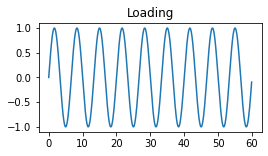

In [6]:
# time paramaters
tmax = 60
dt = 0.1
steps = int(tmax/dt)
t = np.arange(steps) * dt

# load paramaters
fp = 0.15
psin = 1*np.sin(2*math.pi*fp*t)
pzero = 0*t

# excite the first mass
p_mat = [psin]
fig, ax = plt.subplots(1,1, figsize=(4,2))
ax.set_title('Loading')
plt.plot(t, psin)
plt.show()

## Control model

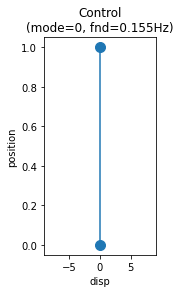

In [7]:
# model input
m = 1
k = 1
xi = 0.05
wn = math.sqrt(k/m)
c = 2*xi*wn*m

# define model
ctrl = LumpedMassStickModel([m], [k], [c], [psin], dt, name='Control')

# plot anaimation
fig, axs = plt.subplots(1,1, figsize=(2,4))
ani = ctrl.get_animation(fig=fig,ax=axs,mode=0)
plt.show()

## Tuned mass damper

In [ ]:
md = 0.05*m
mbar = md/m
fopt = math.sqrt(1-.5*mbar)/(1+mbar)
xidopt = math.sqrt(
    mbar*(3-math.sqrt(.5*mbar))/
    (8*(1+mbar)*(1-.05*mbar))
)
kd = mbar*fopt**2*k
wnd = math.sqrt(kd/md)
cd = 2*xidopt*wnd*md

In [ ]:
tmd = LumpedMassStickModel([m, md], [k, kd], [c, cd], [psin, pzero], dt, name="Tuned-Mass Damper")

# plot anaimation
fig, axs = plt.subplots(1,1, figsize=(2,4))
ani = tmd.get_animation(mode=0,fig=fig,ax=axs)
plt.show()

## Comparison

In [ ]:
fig, ax = plt.subplots(figsize=(5,3))
ctrl.get_time_history_plt(ax)
tmd.get_time_history_plt(ax)
plt.legend()
plt.show()